# K-means Clustering

In [116]:
import pandas as pd

In [117]:
df = pd.read_excel('../data/data.xlsx')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,43,150000


loads the libraries

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

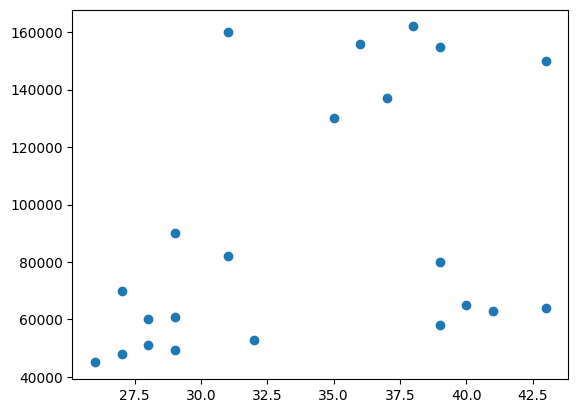

In [119]:
plt.figure()
plt.scatter(df['Age'],df['Income'])

In [120]:
N_clusters = 3

km = KMeans(n_clusters=N_clusters)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [121]:
y_predicted1 = km.fit_predict(df[['Age','Income']])
y_predicted1

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [122]:
df['cluster1'] = y_predicted1
df.head()

,Name,Age,Income,cluster1
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,43,150000,1


C:\Users\Nick Wisely\AppData\Local\Temp\ipykernel_17644\2830596606.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


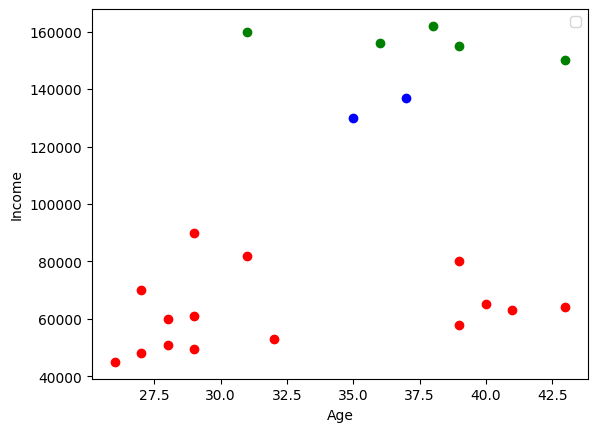

In [123]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]

plt.figure()
plt.scatter(df1.Age,df1['Income'],color ='red')
plt.scatter(df2.Age,df2['Income'],color ='green')
plt.scatter(df3.Age,df3['Income'],color ='blue')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = '*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


Problem: the two features were not scaled properly, income in thousand dollars while the age in 10s integers. 

Solution: MinMax Scaler

In [124]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age_scale'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income']])
df['Income_scale'] = scaler.transform(df[['Income']])
df

,Name,Age,Income,cluster1,Age_scale,Income_scale
0,Rob,27,70000,0,0.058824,0.213675
1,Michael,29,90000,0,0.176471,0.384615
2,Mohan,29,61000,0,0.176471,0.136752
3,Ismail,28,60000,0,0.117647,0.128205
4,Kory,43,150000,1,1.000000,0.897436
5,Gautam,39,155000,1,0.764706,0.940171
6,David,31,160000,1,0.294118,0.982906
7,Andrea,38,162000,1,0.705882,1.000000
8,Brad,36,156000,1,0.588235,0.948718
9,Angelina,35,130000,2,0.529412,0.726496


In [125]:
y_predicted2 = km.fit_predict(df[['Age_scale','Income_scale']])
y_predicted2

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2],
      dtype=int32)

In [126]:
df['cluster2'] = y_predicted2
df.head()

,Name,Age,Income,cluster1,Age_scale,Income_scale,cluster2
0,Rob,27,70000,0,0.058824,0.213675,0
1,Michael,29,90000,0,0.176471,0.384615,0
2,Mohan,29,61000,0,0.176471,0.136752,0
3,Ismail,28,60000,0,0.117647,0.128205,0
4,Kory,43,150000,1,1.000000,0.897436,1


C:\Users\Nick Wisely\AppData\Local\Temp\ipykernel_17644\196746342.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


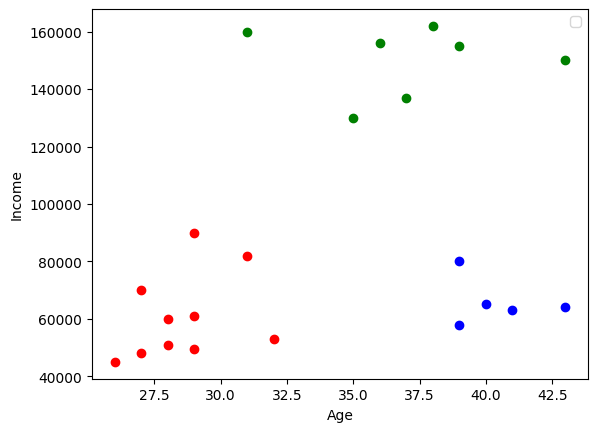

In [127]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

plt.figure()
plt.scatter(df1.Age,df1['Income'],color ='red')
plt.scatter(df2.Age,df2['Income'],color ='green')
plt.scatter(df3.Age,df3['Income'],color ='blue')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = '*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


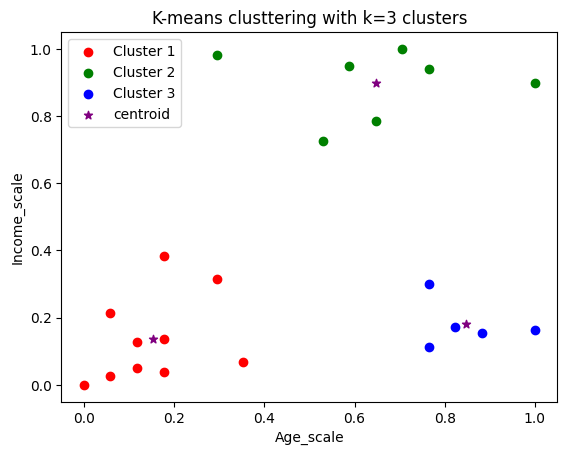

In [128]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

plt.scatter(df1.Age_scale,df1['Income_scale'],color ='red', label = 'Cluster 1')
plt.scatter(df2.Age_scale,df2['Income_scale'],color ='green', label = 'Cluster 2')
plt.scatter(df3.Age_scale,df3['Income_scale'],color ='blue', label = 'Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = '*', label='centroid')
plt.xlabel('Age_scale')
plt.ylabel('Income_scale')
plt.title(f'K-means clusttering with k={N_clusters} clusters')
plt.legend()

plt.savefig('../result/clustering_k_means.png')
plt.show()

How to decide how much cluster do we need?

asnwer: we can observe by plotting the Elbow plot

In [129]:
k_rng = range(1,10)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age_scale','Income_scale']])
    sse.append(km.inertia_)

sse

[5.266820571440836,
 2.2839366831803183,
 0.6638731285013781,
 0.5387326229043912,
 0.3565082906758077,
 0.3432411677162217,
 0.23278383042379153,
 0.19715031677072914,
 0.17105724900729785]

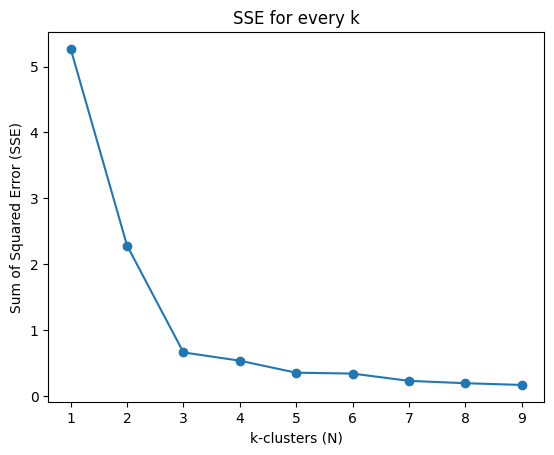

In [130]:
plt.figure()
plt.xlabel('k-clusters (N)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse, marker = 'o')
plt.title("SSE for every k")

plt.savefig('../result/Elbow_plot.png')
plt.show()

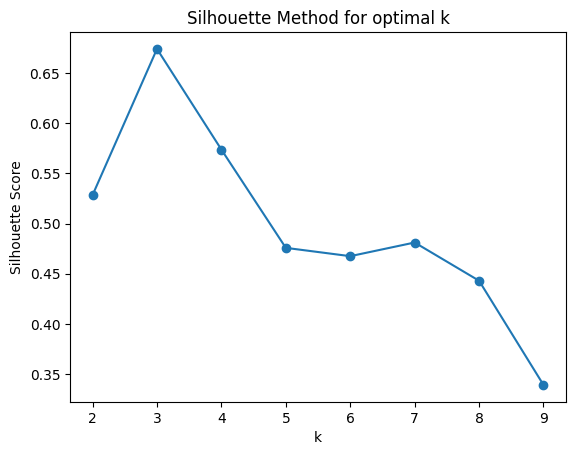

In [131]:
from sklearn.metrics import silhouette_score

k_rng = range(2, 10)
sil_scores = []

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=20)
    km.fit(df[['Age_scale','Income_scale']])
    sil = silhouette_score(df[['Age_scale','Income_scale']], km.labels_)
    sil_scores.append(sil)

plt.figure()
plt.plot(k_rng, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for optimal k")

plt.savefig('../result/Silhouette_score_plot.png')
plt.show()
